# TEST FOR NORMALITY USING PYTHON

## Importing libraries

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
# gettin the data
data_2 = pd.read_csv("http://bit.ly/GaussianDistributionDataset1",header = None)
data_2.head()

,0
0,116.665861
1,107.741260
2,92.701130
3,90.084331
4,94.824923


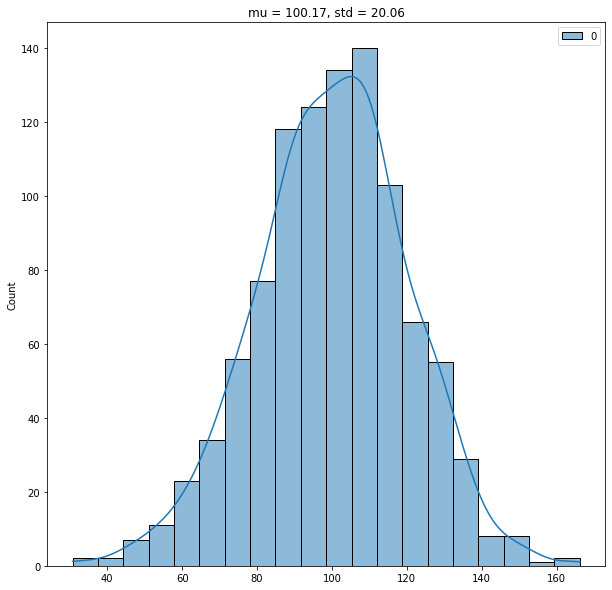

In [38]:
#fit the normal distribution
from scipy.stats import norm
mu, std = norm.fit(data_2)
p = norm.pdf(data_2, mu, std)
plt.figure(figsize=(10,10))
sns.histplot(data_2,bins= 20, edgecolor = "black" , kde=True, color="green")
plt.title("mu = %.2f, std = %.2f" %(mu, std))
plt.show()
# The graph below is a normal distribution curve

In [39]:
data_3 = pd.read_csv("http://bit.ly/NormalisationPricesDataset", header = 0)
data_3.head()

,Unnamed: 0,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,no,no,yes,94,1
1,2,1795,33,85,2,14,no,no,yes,94,1
2,3,1595,25,170,4,15,no,no,yes,94,1
3,4,1849,25,170,8,14,no,no,no,94,1
4,5,3295,33,340,16,14,no,no,yes,94,1


In [69]:
data_3.shape
data_3.columns.to_list()
df = data_3.iloc[:,[1,2,3,4,5,6,7,8,9,10]]

In [70]:
df.corr()

,price,speed,hd,ram,screen,ads,trend
price,1.000000,0.300976,0.430258,0.622748,0.296041,0.054540,-0.199987
speed,0.300976,1.000000,0.372304,0.234760,0.189074,-0.215232,0.405438
hd,0.430258,0.372304,1.000000,0.777726,0.232802,-0.323222,0.577790
ram,0.622748,0.234760,0.777726,1.000000,0.208954,-0.181670,0.276844
screen,0.296041,0.189074,0.232802,0.208954,1.000000,-0.093919,0.188614
ads,0.054540,-0.215232,-0.323222,-0.181670,-0.093919,1.000000,-0.318553
trend,-0.199987,0.405438,0.577790,0.276844,0.188614,-0.318553,1.000000


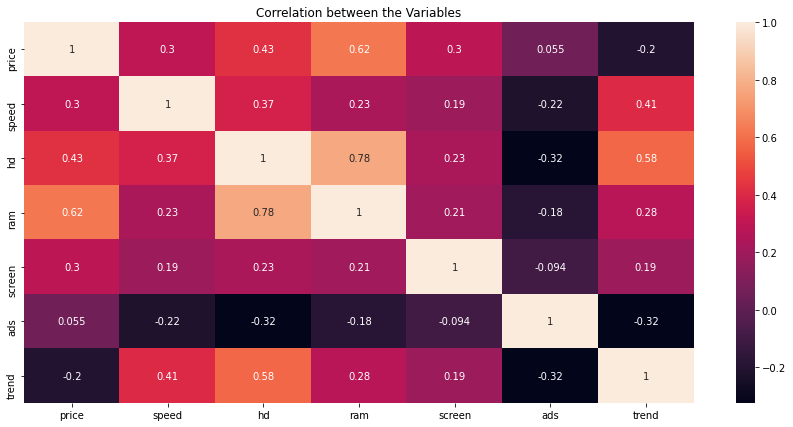

In [73]:
#correlation between the data points
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot= True)
plt.title("Correlation between the Variables")
plt.show()


#### Observation 
The items that show a higher correaltion to price is the RAM. With 62% of the obseravtion being expressed by it

In [29]:
price = data_3['price']

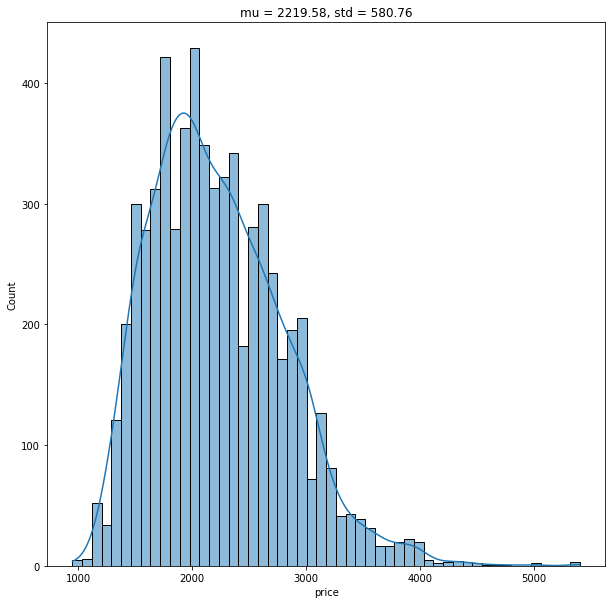

In [75]:
plt.figure(figsize=(10,10))
sns.histplot(price, kde= True, edgecolor = "black")
mu, std = norm.fit(price)
plt.title("mu = %.2f, std = %.2f" %(mu, std))
plt.show()

The data is skewed to the left meaning that we have alot of items fetching a lower price, while the expensive item 
having a smaller portion

## Quantitle-Quantile (Q-Q) Plot

The Q-Q plot generates its own sample of the idealized distribution. The samples are divided into groups called quantiles.

In [76]:
#importing the libraries for the QQ plot
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

<Figure size 1080x720 with 0 Axes>

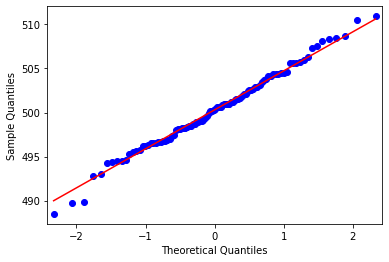

In [106]:
#seed the random number generator
from numpy.random import seed
from numpy.random import randn
seed(1)
#generate a univariate observation
plt.figure(figsize=(15,10))
data = 5 * randn(100) + 500
qqplot(data, line= 's')
plt.show()

The figure above is a normal distribution, as the data points lie on the straight line.

In [82]:
# We look at the data below to determine whether the data is normally distributed using
# Q-Q plot
data_4 = pd.read_csv('http://bit.ly/GaussianDistributionDataset2', header= None)
data_4.head()

,0
0,107.931822
1,69.449831
2,124.283718
3,100.110009
4,148.816515


<Figure size 1080x720 with 0 Axes>

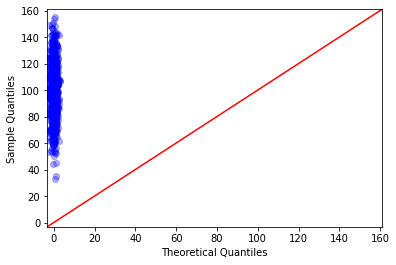

In [123]:
plt.figure(figsize=(15, 10))
qqplot(data_4,  alpha=0.3, line='45')
plt.show()

In [125]:
data_5 = pd.read_csv('http://bit.ly/IndianPremierLeagueDataset')
data_5.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


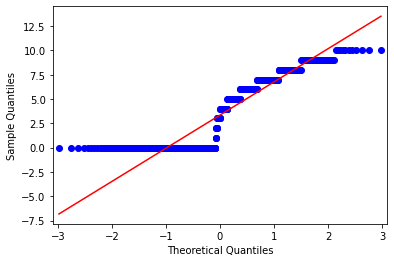

In [135]:
df = data_5['win_by_wickets']
qqplot(df, line = 's')
plt.show()

In [129]:
df.isnull().sum()

0

# Shapiro-Wilk Test

Evaluates whether a sample has been drawn from from a gaussian distribution. (Used to test for normality in a data set)

In [144]:
#importing the shapiro function 
from scipy.stats import shapiro
data = 5 * randn(100) + 50
#test for normality
stat, p = shapiro(data)
print('Statistics= %.3f, p= %.3f'%(stat, p))
print("==================================")
alpha = 0.05
if p > alpha:
    print("Sample looks Gaussian")
else:
    print("Sample does not look Gaussian")

Statistics= 0.984, p= 0.270
Sample looks Gaussian


In [ ]:
data_6 = pd.read_csv('https://raw.githubusercontent.com/ManasHardas/shapiro-wilk-tests/master/test_datasets/normal3.txt', header = None)
data_6.head()

In [154]:
stat, p = shapiro(data_6)
print('Statsistic = %.3f, p = %.3f'%(stat, p))
print("==================================")
alpha = 0.05
if p > alpha:
    print('Similar to Gaussian')
else:
    print('Not similar to Gaussian')

Statsistic = 0.999, p = 0.558
Similar to Gaussian


In [155]:
data_7 = pd.read_csv('http://bit.ly/IndianPremierLeagueDataset')

In [157]:
data_7.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [158]:
runs = data_7['win_by_runs']
runs.head()

0    35
1     0
2     0
3     0
4    15
Name: win_by_runs, dtype: int64

In [208]:
import scipy.stats as stats
print(stats.skew(runs))
print(runs.mean())

2.528890929167058
13.472701149425287


In [161]:
def _print_shap(df):
    stat, p = shapiro(df)
    print('Statsistic = %.3f, p = %.3f'%(stat, p))
    print("==================================")
    alpha = 0.05
    if p > alpha:
        print('Similar to Gaussian')
    else:
        print('Not similar to Gaussian')
    


In [162]:
_print_shap(runs)

Statsistic = 0.638, p = 0.000
Not similar to Gaussian


## Anderson Darling Test

 It is used to test whether a data sample comes from one of many known data samples, it can be used to check whether a data sample is normal.
 Returns a list of critical values, aside from the p-value

It will check against the Gaussian distribution (dist='norm')


In [166]:
#importing the function the anderson function from scipy
from scipy.stats import anderson
#seeding the random number generator
seed(1)
data = 5 * randn(100) + 50
result = anderson(data)
print("Statsistic: %.3f"% result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal'%(sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal'%sl, cv)

Statsistic: 0.220
15.000: 0.555, data looks normal
10.000: 0.632, data looks normal
5.000: 0.759, data looks normal
2.500: 0.885, data looks normal
1.000: 1.053, data looks normal


In [261]:
data

array([47.99560904, 54.12002809, 47.18847284, 59.77439038, 43.34024167,
       41.1965572 , 41.74639367, 45.54722208, 44.40442301, 59.78039452,
       48.36750251, 43.28662105, 55.57191488, 47.06738031, 43.81573312,
       54.37919464, 53.11681088, 47.82521659, 57.0377    , 50.6455079 ,
       58.08474799, 52.51370441, 57.7940277 , 50.54701348, 43.90127802,
       62.24684325, 47.27112916, 49.00581069, 46.49800748, 48.98302776,
       51.21334721, 51.00915089, 53.30510144, 58.96079104, 49.39767714,
       43.83439632, 44.08840937, 46.67122741, 41.62902096, 54.12514912,
       47.50893218, 48.44507511, 49.99054259, 43.01689788, 45.6934182 ,
       53.37355763, 53.09269565, 47.78414035, 59.05267457, 43.47136539,
       48.27506395, 48.84580128, 36.034575  , 59.68764407, 51.83166007,
       44.77705309, 60.25586721, 52.92831   , 52.1476307 , 46.96500801,
       50.53111362, 42.37159842, 53.97513047, 48.12780841, 50.67024098,
       56.01027431, 51.42374055, 51.31233723, 51.38249652, 46.33

In [279]:
#importing dataset 
data_8 = pd.read_csv("http://bit.ly/IndianPremierLeagueDataset")
data_8.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


<AxesSubplot:>

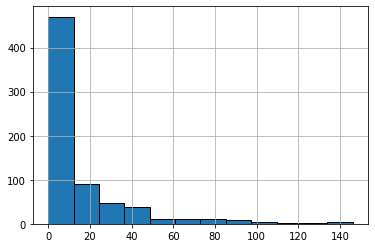

In [285]:
# We shall determine whether the data set above is a Gaussian distribution
win_runs = data_8['win_by_runs']
win_runs.hist(bins = 12, edgecolor = "black")
#having a hist plot shows that the data is normally distributed, we shall howver conduct a ANderson
#test. The data has been skewed to the right.

In [287]:
result_2 = anderson(win_runs)
result_2

AndersonResult(statistic=88.75122961841282, critical_values=array([0.573, 0.652, 0.783, 0.913, 1.086]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [298]:
print('Statistic: {:.3f}' .format(result.statistic))
p = 0
for i in range(len(result_2.critical_values)):
    sl, cv = result_2.significance_level[i], result_2.critical_values[i]
    if result_2.statistic < result_2.critical_values[i]:
        print("{:.2f}, {:.2f}, data looks normal".format(sl, cv))
    else:
         print("{:.2f}, {:.2f}, data does not looks normal".format(sl, cv))

Statistic: 0.252
15.00, 0.57, data does not looks normal
10.00, 0.65, data does not looks normal
5.00, 0.78, data does not looks normal
2.50, 0.91, data does not looks normal
1.00, 1.09, data does not looks normal


# D'Agostino's K^2 Test


Calculates the summary statistics from the data. i.e the kutosis and the skewness to determine if the data distribution depsrts from the normal distribution.
1. **Skew** - measure of how much the distribution is pushed to the right or to the left.
2. **Kurtosis** - Quantifies how much the distribution is in the tail.

In [302]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest
seed(1)

data = 5 * randn(100) + 50
#normality test
stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print("Sample looks Gaussian")
else:
    print("Sample does not look Gaussian")



Statistics=0.102, p=0.950
Sample looks Gaussian


In [306]:
data_9 = pd.read_csv('https://raw.githubusercontent.com/ManasHardas/shapiro-wilk-tests/master/test_datasets/normal3.txt', header = None)
data_9

,0
0,82.294827
1,130.734276
2,59.993252
3,103.605770
4,129.715087
...,...
995,112.154898
996,93.170387
997,92.282369
998,80.517279


In [309]:
stat, p = normaltest(data_9)
print("Statistic : %.3f, p = %.3f" %(stat, p))
alpha = 0
print('__________________________________')
if p > alpha:
    print("Sample is Gaussian")
else:
    print("Sample does not look Gaussian")

Statistic : 0.210, p = 0.900
__________________________________
Sample is Gaussian


<AxesSubplot:ylabel='Count'>

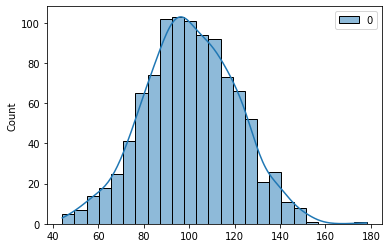

In [311]:
sns.histplot(data_9, kde=True)